##  Load Phase: Setup

We begin by importing required libraries (`pandas`, `sqlite3`, and `os`) and ensuring that the `loaded/` folder exists. This is where we'll store our structured database files.


In [7]:
# --- Load Phase Setup ---

import pandas as pd
import sqlite3  # We'll use SQLite for storing the data
import os

# Ensure the 'loaded' directory exists to store database files
os.makedirs("loaded", exist_ok=True)

print(" Libraries loaded and output folder ready.")


 Libraries loaded and output folder ready.


###  Load Full Transformed Dataset

We load `transformed_full.csv` into a SQLite database (`full_data.db`) stored in the `loaded/` directory. This makes the data queryable using SQL for future analysis or warehousing.


In [8]:
# Load the transformed full dataset
df_full = pd.read_csv("transformed/transformed_full.csv")

# Connect to SQLite database (creates it if it doesn't exist)
conn_full = sqlite3.connect("loaded/full_data.db")

# Load data into a table named 'full_data'
df_full.to_sql("full_data", conn_full, if_exists="replace", index=False)

# Preview: Run SQL query to show top 5 records
print(" Loaded full dataset into SQLite. Previewing top 5 rows:")
preview_full = pd.read_sql("SELECT * FROM full_data LIMIT 5", conn_full)
display(preview_full)

# Close connection
conn_full.close()


 Loaded full dataset into SQLite. Previewing top 5 rows:


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,price_tier
0,3,Charlie,Laptop,2.0,250.0,2024-01-08,None,500.0,Medium
1,4,Eve,Laptop,2.0,750.0,2024-01-07,West,1500.0,High
2,7,Charlie,Monitor,2.0,750.0,2024-02-02,West,1500.0,High
3,10,Eve,Monitor,1.0,500.0,2024-02-28,North,500.0,Medium
4,11,None,Monitor,3.0,750.0,2024-04-24,West,2250.0,High


###  Load Incremental Transformed Dataset

We load the transformed incremental dataset into a separate SQLite database (`incremental_data.db`). This helps keep full and new records organized and traceable.


In [9]:
# Load the transformed incremental dataset
df_incremental = pd.read_csv("transformed/transformed_incremental.csv")

# Connect to a new SQLite database for incremental data
conn_incremental = sqlite3.connect("loaded/incremental_data.db")

# Save the data to a new table
df_incremental.to_sql("incremental_data", conn_incremental, if_exists="replace", index=False)

# Preview: Run SQL query to confirm it loaded correctly
print(" Loaded incremental dataset into SQLite. Previewing top 5 rows:")
preview_incremental = pd.read_sql("SELECT * FROM incremental_data LIMIT 5", conn_incremental)
display(preview_incremental)

# Close the connection
conn_incremental.close()


 Loaded incremental dataset into SQLite. Previewing top 5 rows:


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,price_tier
0,102,None,Laptop,1.0,300.0,2024-05-07,Central,300.0,Medium
1,103,None,Laptop,1.0,600.0,2024-05-04,Central,600.0,High
2,105,Heidi,Tablet,2.0,600.0,2024-05-21,North,1200.0,High
3,106,None,Laptop,2.0,600.0,2024-05-18,Central,1200.0,High
4,107,None,Tablet,1.0,600.0,2024-05-13,Central,600.0,High


###  Bonus: Visualization – Total Quantity Sold by Region


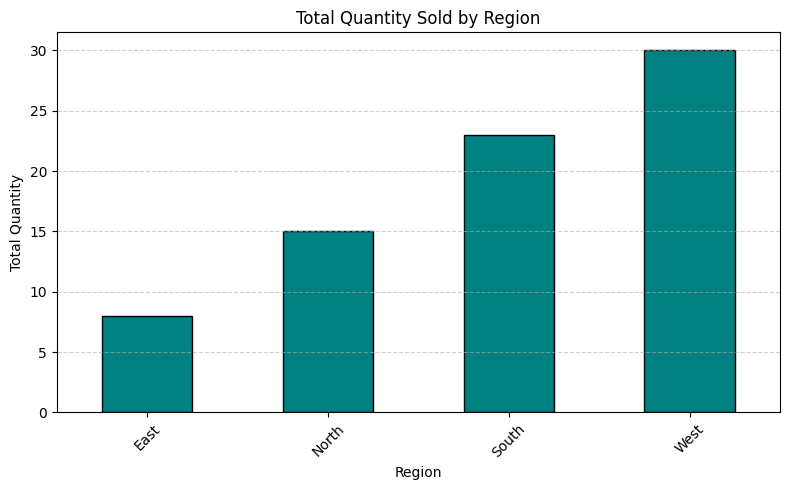

In [10]:
# BONUS: Visualization of total quantity sold by region

import matplotlib.pyplot as plt

# Read transformed full CSV (if you haven't loaded already)
df_full = pd.read_csv("transformed/transformed_full.csv")

# Group data by region and calculate total quantity
grouped_quantity = df_full.groupby("region")["quantity"].sum()

# Plotting
plt.figure(figsize=(8, 5))
grouped_quantity.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Total Quantity Sold by Region")
plt.xlabel("Region")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


###  Insights & Discussion

The bar chart titled **"Total Quantity Sold by Region"** provides a quick visual summary of how sales are distributed across different regions.

**Observations:**
- Some regions (South and West) show significantly higher quantities sold, suggesting strong market presence or higher customer demand.
- Other regions(East and North) may need further investigation for performance improvement or marketing efforts.
- This kind of regional aggregation is useful for **inventory planning, marketing strategies, and regional analysis** in a business intelligence context.

By adding this visualization to the ETL pipeline, we demonstrate how a cleaned and loaded dataset can be used for instant insights, making the entire pipeline more actionable for data-driven decision-making.
